Na par primera prikazaćemo rad Box-Cox transformacije podataka.

Pripremamo podatke.

**Uzorak koji koristimo:** Pruski konjanici koji su poginuli od udarca konja. Ovaj klasični skup podataka se dugo koristi kao primer nenormalne (Poasonove) raspodele podataka. U ovom skupu podataka, Bortkiewicz (1898) je prikupio broj konjanika u svakoj pruskoj vojnoj jedinici koji su svake godine poginuli od udarca konja između 1875. i 1894. godine.

In [1]:
# potrebne biblioteke
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from scipy.stats import skew

from scipy.stats import boxcox

In [18]:
data_dict = {
    'Year': [1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894],
    'GC': [0, 2, 2, 1, 0, 0, 1, 1, 0, 3, 0, 2, 1, 0, 0, 1, 0, 1, 0, 1],
    'C1': [0, 0, 0, 2, 0, 3, 0, 2, 1, 0, 0, 1, 1, 1, 0, 2, 0, 3, 0, 0],
    'C2': [0, 0, 0, 2, 0, 2, 0, 0, 2, 1, 0, 0, 2, 1, 1, 0, 0, 2, 0, 0],
    'C3': [0, 0, 0, 1, 1, 1, 2, 0, 1, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0],
    'C4': [0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 0, 0],
    'C5': [0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0],
    'C6': [0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0],
    'C7': [0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 1, 1, 3, 1, 1, 2, 0, 3, 0, 0],
    'C8': [1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 2, 0, 0, 2, 1, 0, 2, 0],
    'C9': [1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1],
    'C10': [0, 0, 1, 0, 0, 1, 1, 2, 1, 0, 2, 1, 0, 0, 1, 1, 0, 0, 0, 0],
    'C11': [0, 0, 0, 0, 0, 4, 0, 2, 0, 2, 0, 0, 0, 0, 2, 1, 3, 0, 1, 1],
    'C14': [1, 0, 2, 1, 1, 3, 0, 4, 3, 0, 1, 1, 1, 1, 2, 2, 0, 1, 3, 1],
    'C15': [0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0]
}

data = pd.DataFrame(data_dict)

# Pamtimo podastke u csv fajl
data.to_csv('data/prussian_horse_kick_data.csv', index=False)

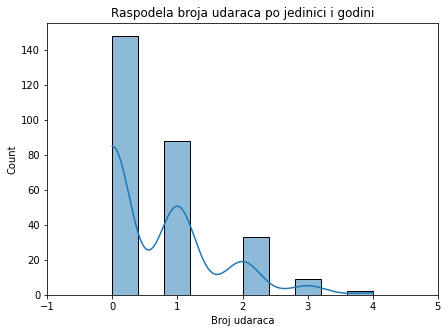

Skew:1.2554437113241088


In [19]:
melted_data = data.melt(id_vars=['Year'], var_name='Unit', value_name='Kicks')

# Graficki prikaz raspodele broja udaraca po jedinici godišnje
plt.figure(figsize = (7, 5))
sns.histplot(melted_data['Kicks'], bins=10, kde=True)
plt.title('Raspodela broja udaraca po jedinici i godini')
plt.xlabel('Broj udaraca')

plt.xticks([-1, 0, 1, 2, 3, 4, 5])
plt.show()

# Racunamo asimetriju
skew_val = skew(melted_data['Kicks'], axis=0, bias=True)
print('Skew:{}'.format(skew_val))

Kao sto očigledno možemo videti, uzorak **ne prati normalnu raspodelu**. 

Ima više vrednosti u levoj polovini grafika, tj. ima pozitivnu (desnu asimetriju), sto potvrđuje i izračunata vrednost skew > 0.

## Box-Cox transformacija

Box-Cox transformacija je stepena transformacija koja koristi parametar $λ$ da prilagodi raspodelu podataka. Različite vrednosti za lambdu omogućavaju različite tipove transformacija, pa Box-Cox transformaciju možemo posmatrati kao familiju različitih stepenih transformacija.

S obzirom na to da λ može uzeti gotovo beskonačan broj vrednosti, teoretski možemo odrediti transformaciju originalnih podataka da bude maksimalno efikasna u približavanju tražene zavisne promenljive normalnoj raspodeli, bez obzira na to da li je ta raspodela negativno ili pozitivno asimetrična. 

Takođe, kao što je gore pomenuto, ova porodica transformacija uključuje mnoge tradicionalne transformacije, koje dobijamo za različitu vrednost $λ$:

 - λ = 1.00: daje rezultate identične originalnim podacima
 - λ = 0.50: transformacija pomoću kvadratnog korena
 - λ = 0.33: transformacija pomoću kubnog korena
 - λ = 0.00: transformacija pomoću prirodnog logaritma
 - λ = -1.00: transformacija pomoću recipročne (inverzne) vrednosti

Navedene transformacije upoređujemo u [svesci](04_data_transformations.ipynb).

Bitna osobina je da ova transformacija radi samo sa **pozitivnim** zavisnim promenljivama.

Najčešće za sprovođenje transformacije koristi funkcija boxcox iz biblioteke **scipy.stats** koja omogućava automatsko određivanje optimalne vrednosti λ tako da **maksimizuje normalnost transformisanih podataka**. Kada pozovemo funkciju bez eksplicitnog zadavanja vrednosti λ, ona će pronaći najbolju moguću vrednost koja minimizuje asimetriju i približava raspodelu normalnoj.

Vraćamo se na naš skup podataka i proveravamo da li u imamo negativne ili nula vrednosti i ako da transformišemo ih.

In [7]:
total = melted_data['Kicks']
count_zero = len(melted_data[total == 0])
count_negative = len(melted_data[total < 0])

count_zero, count_negative

(148, 0)

Originalna asimetrija: 1.2554437113241088


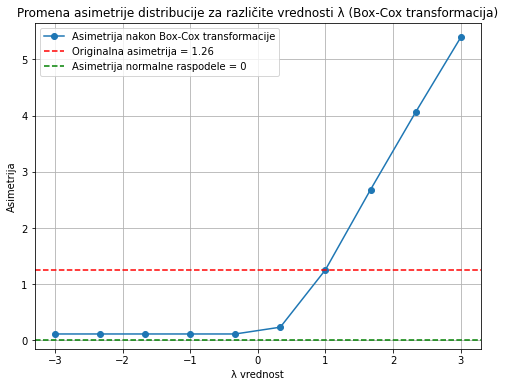

Optimalna vrednost λ prema boxcox funkciji: -0.01658168449728642


In [8]:
# zelimo da uporedimo asimetrije podataka za različite vrednosti λ

lambdas = np.linspace(-3, 3, 10)
skews = []

# dodajemo 1e-9 zbog neophodnosti rada sa pozitivnim podacima (u  našem skupu imamo 148 nula vrednosti)
positive_data = melted_data['Kicks'] + 1e-9

# Računamo asimetriju za svaku vrednost λ
for lam in lambdas:
    if lam == 0.00:
        transformed_data = np.log(positive_data) 
    else:
        transformed_data = boxcox(positive_data, lmbda=lam)
    skewness = skew(transformed_data)
    skews.append(skewness)

# Originalna asimetrija (Skewness)
original_skew = skew(positive_data)
print('Originalna asimetrija: {}'.format(original_skew))

# Prikazujemo rezultate na grafiku
plt.figure(figsize=(8, 6))
plt.plot(lambdas, skews, marker='o', label='Asimetrija nakon Box-Cox transformacije')
plt.axhline(y=original_skew, color='red', linestyle='--', label=f'Originalna asimetrija = {original_skew:.2f}')
plt.axhline(y=0, color='green', linestyle='--', label='Asimetrija normalne raspodele = 0')
plt.title('Promena asimetrije distribucije za različite vrednosti λ (Box-Cox transformacija)')
plt.xlabel('λ vrednost')
plt.ylabel('Asimetrija')
plt.legend()
plt.grid(True)
plt.show()

# Primeniti automatski odabranu optimalnu vrednost λ
optimal_transformed_data, optimal_lambda = boxcox(positive_data)
print(f'Optimalna vrednost λ prema boxcox funkciji: {optimal_lambda}')

**Log-verovatnoća** je koncept iz statistike koji se koristi u kontekstu procene parametara modela, uključujući i procenu optimalne vrednosti λ u Box-Cox transformaciji. Log-verovatnoća je logaritamska vrednost funkcije verovatnoće. 

Posmatramo kolika je verovatnoća da su podaci proizvedeni iz distribucije koja je transformisana Box-Cox transformacijom sa određenom vrednošću λ.

**Tražimo vrednost koja maksimizuje log-verovatnoću.**
Kada primenjujemo Box-Cox transformaciju, optimizacijski algoritmi isprobavaju različite vrednosti λ i izračunavaju log-verovatnoću za svaku od njih. Vrednost λ koja daje najveću log-verovatnoću smatra se optimalnom jer daje najbolje prilagođenu normalnu distribuciju podacima nakon transformacije.

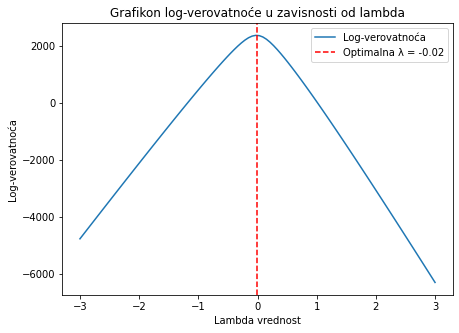

In [9]:
plt.figure(figsize = (7, 5))

# određivanje optimalna vrednost λ
lambdas = np.linspace(-3, 3, 100)
log_likelihoods = []

for l in lambdas:
    log_likelihood = stats.boxcox_llf(l, positive_data)  # Izračunaj log-verovatnoću
    log_likelihoods.append(log_likelihood)

# Plotovanje log-verovatnoće
plt.plot(lambdas, log_likelihoods, label='Log-verovatnoća')
plt.axvline(optimal_lambda, color='red', linestyle='--', label=f'Optimalna λ = {optimal_lambda:.2f}')
plt.xlabel('Lambda vrednost')
plt.ylabel('Log-verovatnoća')
plt.title('Grafikon log-verovatnoće u zavisnosti od lambda')
plt.legend()
plt.show()

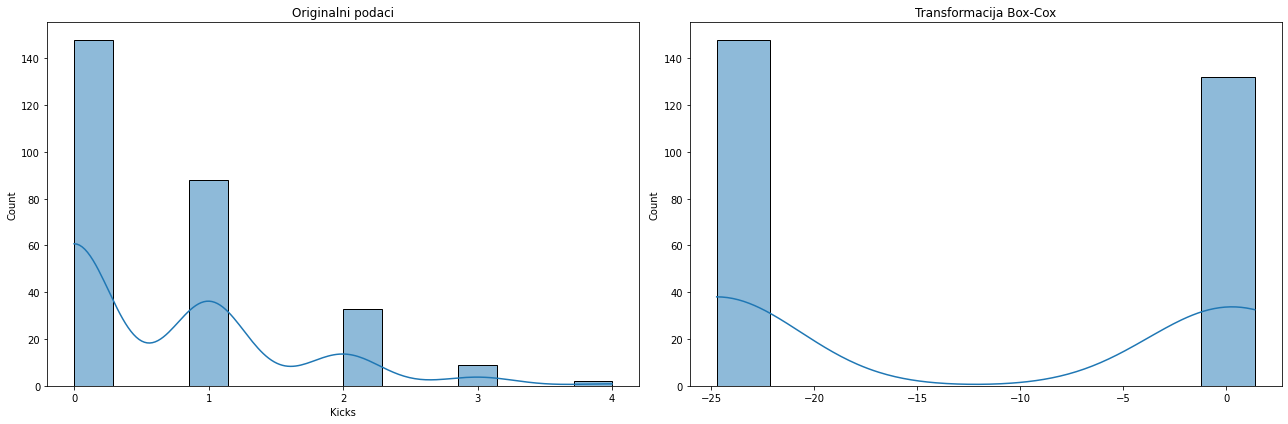

In [13]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.histplot(melted_data['Kicks'], ax=axes[0], kde=True)
axes[0].set_title('Originalni podaci')
axes[0].set_xticks([0, 1, 2, 3, 4])

sns.histplot(optimal_transformed_data, ax=axes[1], kde=True)
axes[1].set_title('Transformacija Box-Cox')

plt.tight_layout()
plt.show()

----------------------------------------------------------------------------------------------------------------

 Posmatramo Box-Cox na drugom skupu podataka. 
 
 Uvozimo podatke

In [24]:
import os

# formiramo putanju do fajla
current_dir = os.getcwd()

file_name = 'data/air_time.csv'
file_path = os.path.join(current_dir, file_name)

try:
    data = pd.read_csv(file_path)
    print("File loaded successfully")
except FileNotFoundError as e:
    print(f"Error: {e}")

print('Total data points:{}'.format(len(data['AIR_TIME'])))
data.head()

File loaded successfully
Total data points:12657


,MONTH,AIR_TIME
0,1,28
1,1,29
2,1,29
3,1,29
4,1,29


Ispitujemo da li imamo negativne ili nula vrednosti u skupu pdataka.

In [15]:
total_column = data['AIR_TIME']

len(data[total_column == 0]), len(data[total_column < 0])

(0, 0)

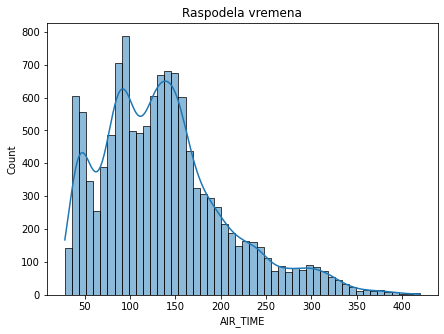

Skew:0.9008388414372591


In [21]:
plt.figure(figsize = (7, 5))

# pravimo histogram
sns.histplot(total_column, bins=50, kde=True)
plt.title('Raspodela vremena')

plt.show()

skew_val = skew(total_column, axis=0, bias=True)
print('Skew:{}'.format(skew_val))

Kao sto ocigledno mozemo videti, uzorak **ne prati normalnu raspodelu**. 

Ima vise vrednosti u levoj polovini grafika, tj ima pozitivnu (desnu asimetriju), sto potvrđuje i izračunata vrednost skew > 0.

Originalna asimetrija: 0.9008388414372591


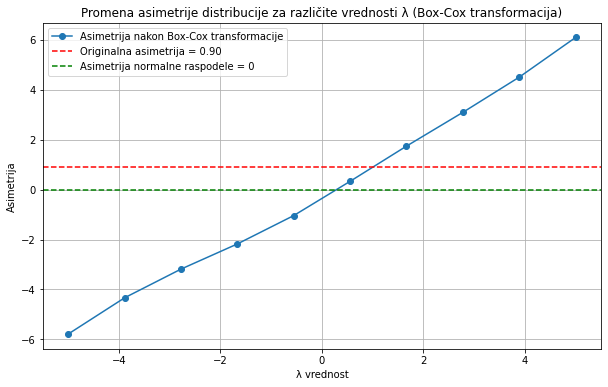

Optimalna vrednost λ prema boxcox funkciji: 0.2807713393426487


In [45]:
# racunamo asimetriju za razlicite vrednosti lambda
lambdas = np.linspace(-5, 5, 10)
skews = []

# Izračunaj asimetriju za svaku vrednost λ
for lam in lambdas:
    if lam == 0.00:
        transformed_data = np.log(total_column)
    else:
        transformed_data = boxcox(total_column, lmbda=lam)
    skewness = skew(transformed_data)
    skews.append(skewness)

# Originalna asimetrija (Skewness)
original_skew = skew(total_column)
print('Originalna asimetrija: {}'.format(original_skew))

# Prikaži rezultate na grafiku
plt.figure(figsize=(10, 6))
plt.plot(lambdas, skews, marker='o', label='Asimetrija nakon Box-Cox transformacije')
plt.axhline(y=original_skew, color='red', linestyle='--', label=f'Originalna asimetrija = {original_skew:.2f}')
plt.axhline(y=0, color='green', linestyle='--', label='Asimetrija normalne raspodele = 0')
plt.title('Promena asimetrije distribucije za različite vrednosti λ (Box-Cox transformacija)')
plt.xlabel('λ vrednost')
plt.ylabel('Asimetrija')
plt.legend()
plt.grid(True)
plt.show()

# Odabir optimalne vrednosti za λ
optimal_transformed_data, optimal_lambda = boxcox(total_column)
print(f'Optimalna vrednost λ prema boxcox funkciji: {optimal_lambda}')

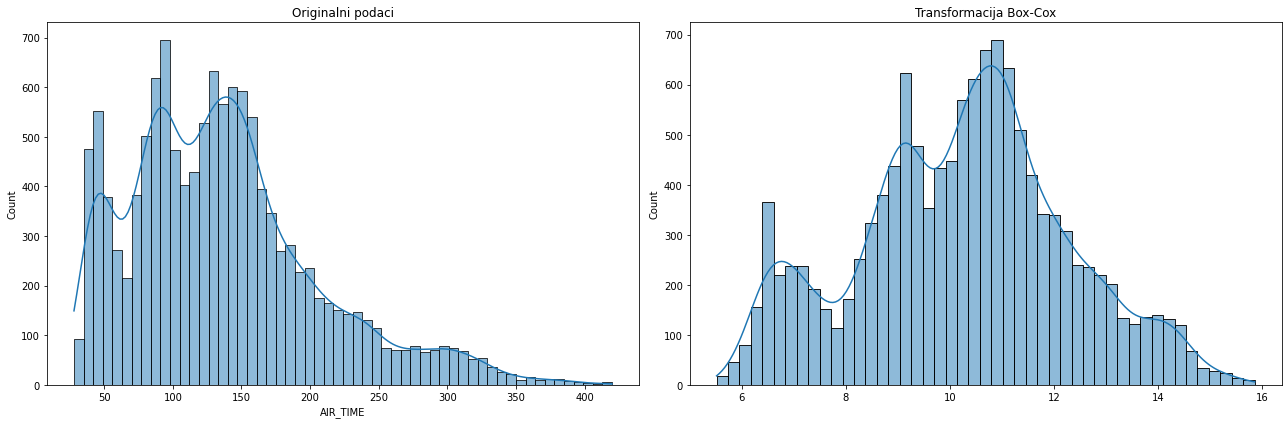

In [23]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))


sns.histplot(total_column, ax=axes[0], kde=True)
axes[0].set_title('Originalni podaci')

sns.histplot(optimal_transformed_data, ax=axes[1], kde=True)
axes[1].set_title('Transformacija Box-Cox')

plt.tight_layout()
plt.show()

Hoćemo da invertujemo podatke u originalne, te primenjujemo inveznu Box-Cox transformaciju.

In [32]:
# uvozimo potrebnu biblioteku
from scipy.special import inv_boxcox

inverse_vals = inv_boxcox(optimal_transformed_data, optimal_lambda)
inverse_vals

array([ 28.,  29.,  29., ..., 418., 419., 420.])

In [36]:
data['AIR_TIME_inv'] = inverse_vals

data.head()

,MONTH,AIR_TIME,AIR_TIME_inv
0,1,28,28.0
1,1,29,29.0
2,1,29,29.0
3,1,29,29.0
4,1,29,29.0


Posmatramo drugi skup podataka, koji će imati normlanu raspodelu.

**Uzorak koji koristimo:** težina i visina muškaraca i žena. Mi filtriramo skup i posmatramo samo težinu muškaraca starijih od 15 godina.

In [41]:
import pandas as pd
import numpy as np
import os

# formiramo putanju do fajla
current_dir = os.getcwd()

file_name = 'data/mw_height_weight.csv'
file_path = os.path.join(current_dir, file_name)

try:
    raw_data = pd.read_csv(file_path)
    
    print("File loaded successfully")
except FileNotFoundError as e:
    print(f"Error: {e}")

filtered_data = raw_data.copy()
filtered_data = filtered_data[(filtered_data.age > 15) & filtered_data.male == 1]
data = filtered_data['weight']
data.head()

File loaded successfully


0    47.825606
3    53.041914
5    62.992589
7    55.479971
9    54.487739
Name: weight, dtype: float64

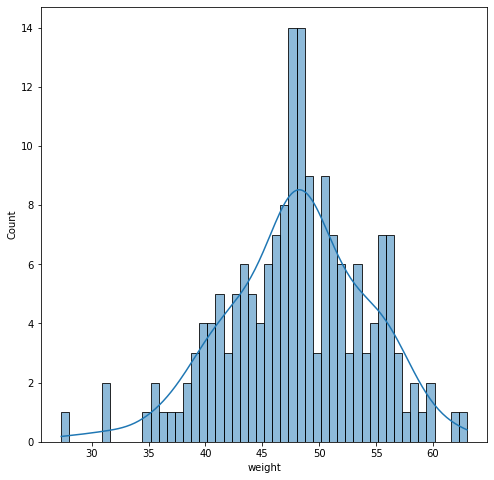

In [42]:
plt.figure(figsize = (8,8))
sns.histplot(data, kde=True, bins=50)
plt.show()

In [43]:
from scipy.stats import shapiro

shapiro_test = stats.shapiro(data)
_, p = shapiro(data)
print('Shapiro-Wilk Test: p=%.3f' % (p))

if p > 0.05:
    print('Podaci su iz normalne raspodele (prihvatamo H0)')
else:
    print('Podaci nisu normalno raspodeljeni (odbacujemo H0)')

Shapiro-Wilk Test: p=0.254
Podaci su iz normalne raspodele (prihvatamo H0)


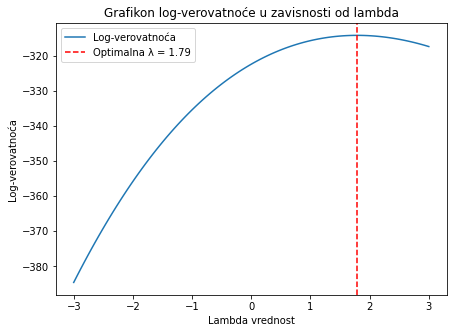

In [46]:
plt.figure(figsize = (7, 5))

# određivanje optimalna vrednost λ
lambdas = np.linspace(-3, 3, 100)
log_likelihoods = []

_, optimal_lambda = boxcox(data)

for l in lambdas:
    log_likelihood = stats.boxcox_llf(l, data)  # Izračunaj log-verovatnoću
    log_likelihoods.append(log_likelihood)

# Plotovanje log-verovatnoće
plt.plot(lambdas, log_likelihoods, label='Log-verovatnoća')
plt.axvline(optimal_lambda, color='red', linestyle='--', label=f'Optimalna λ = {optimal_lambda:.2f}')
plt.xlabel('Lambda vrednost')
plt.ylabel('Log-verovatnoća')
plt.title('Grafikon log-verovatnoće u zavisnosti od lambda')
plt.legend()
plt.show()